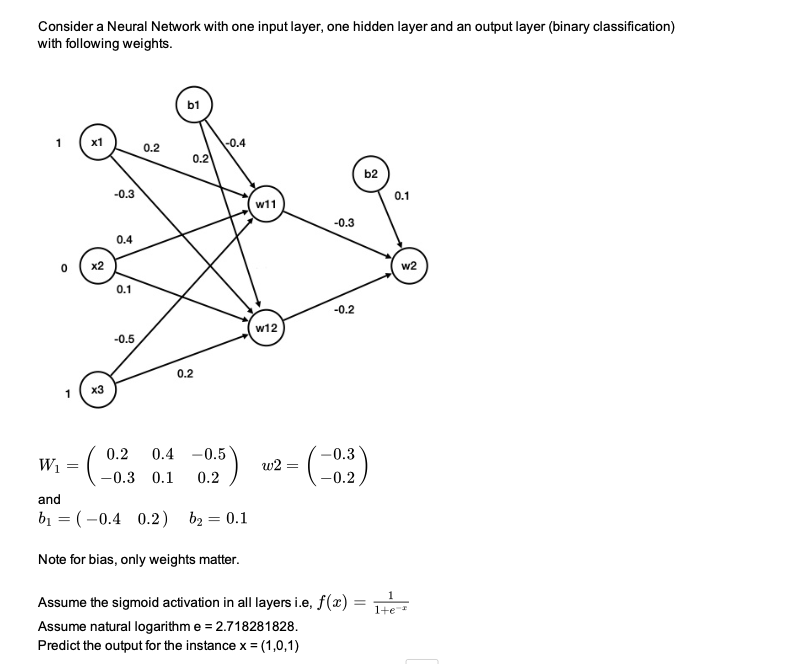

In [3]:

image = "nn.png"
from IPython.display import Image
Image(filename='nn.png') 


# Write code to compute the output of the forward pass

In [15]:
import numpy as np
W1 = np.array([[0.2,0.4,-0.5],[-0.3,0.1,0.2]])
W2 = np.array([-0.3, -0.2])
b1 = np.array([-0.4, 0.2])
b2 = 0.1
X = np.array([1,0,1])

In [27]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [29]:
def compute_activation(w, x, b):
    return sigmoid(w.dot(x) + b)

In [30]:
a1 = compute_activation(W1, X, b1)
a2 = compute_activation(W2, a1, b2)

In [31]:
a2

0.47388889882398544

# Assume y_true (the groundtruth label) is 1, write code to compute cross binary entropy loss

In [50]:
y_true = 1
def cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))
    

In [51]:
cross_entropy(1, a2)

0.7467823754275434

# Assume y_true (the groundtruth label) is 1, write code to compute mean squre error. (Divide by 2 so that it is easy to differentiate)

In [52]:
def mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2) / 2

In [53]:
mse(y_true, a2)

0.1383964453903193

# Using mean squared error as the loss function, compute the delta values for the backward propagation and update the weights

In [45]:
def mse_derivative(y_true, y_pred):
    return y_pred - y_true

In [46]:
lr = 0.1

In [54]:
def sigmoid_derivative(a):
    return a * (1 - a)

In [57]:
error = mse_derivative(y_true, a2)
d2 = error * sigmoid_derivative(a2)



In [58]:
d1 = W2 * d2 * sigmoid_derivative(a1)

In [59]:
dW2 = d2 * a1
db2 = d2

In [60]:
# Gradient for W1 and b1
dW1 = np.outer(d1, X)
db1 = d1

In [62]:
W1 -= lr * dW1
b1 -= lr * db1
W2 -= lr * dW2
b2 -= lr * db2

In [64]:
print("Updated W1:", W1)
print("Updated b1:", b1)
print("Updated W2:", W2)
print("Updated b2:", b2)

Updated W1: [[ 0.19912754  0.4        -0.50087246]
 [-0.30065421  0.1         0.19934579]]
Updated b1: [-0.40087246  0.19934579]
Updated W2: [-0.29564765 -0.1931139 ]
Updated b2: 0.11311690782143446


In [65]:
a1 = compute_activation(W1, X, b1)
a2 = compute_activation(W2, a1, b2)

In [67]:
a2

0.4784889455841556

In [68]:
cross_entropy(1, a2)

0.7371221705834586